In [1]:
%matplotlib inline

## Querying the prompt products database
Goal for today: plotting objects and sources on the sky

In [7]:
import os
import sys
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')
import lsst.afw.geom as afwGeom
import lsst.daf.persistence as dafPersist

In [3]:
repo = '/epyc/users/mrawls/premap2019/hits-lsst/hits2015/rerun/highres1'
butler = dafPersist.Butler(repo)

In [4]:
dbName = 'association.db'
dbPath = os.path.join(repo, dbName)

We will connect to the prompt products database (called `association.db`) using sqlite, and read the data into pandas so we can do python things with it. There are several tables in this database:
* DiaForcedSource
* DiaSource
* DiaObject
* PpdbProtoVisits
* DiaObject_To_Object_Match
* SSObject

"Dia" means "Difference Image Analysis." "Ppdb" means "Prompt Products Database." "Forced" refers to forced photometry - even if there is no source detected at a location, maybe there was before, so measure the brightness there anyway. "SS" refers to Solar System and we won't worry about that.

In [6]:
connection = sqlite3.connect(dbPath)

In [13]:
objTable = pd.read_sql_query('select diaObjectId, ra, decl, nDiaSources, \
                              gPSFluxMean, gPSFluxMeanErr, \
                              validityEnd, flags, \
                              gTOTFluxMean, gTOTFluxMeanErr \
                              from DiaObject where validityEnd is NULL;', connection)

In [12]:
objTable[0:5]

,diaObjectId,ra,decl,nDiaSources,gPSFluxMean,gPSFluxMeanErr,validityEnd,flags,gTOTFluxMean,gTOTFluxMeanErr,gFPFluxMean,gFPFluxMeanErr
0,176486781787570292,151.197871,2.221515,1,NaN,NaN,None,1,-20630.955068,NaN,None,None
1,176486781787570326,150.997772,2.329394,1,160.158040,NaN,None,1,196.567166,NaN,None,None
2,176486781787570340,151.078542,2.322744,1,10953.513450,NaN,None,1,14866.415796,NaN,None,None
3,176486713068093591,149.839390,2.613432,1,2032.066961,NaN,None,1,2230.560014,NaN,None,None
4,176486713068093600,149.869474,2.552636,1,NaN,NaN,None,1,1788.147560,NaN,None,None


In [14]:
len(objTable)

110157

Text(0.5, 1.0, 'Coarse overview of where objects are in the sky')

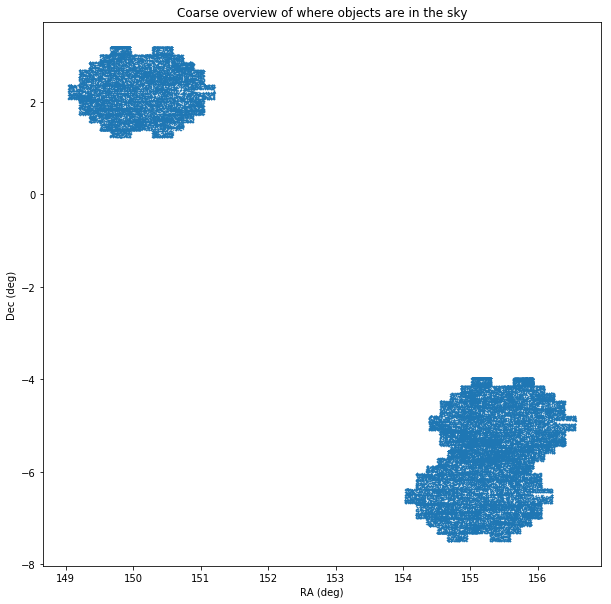

In [19]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(objTable['ra'], objTable['decl'], s=0.5, marker='.')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Coarse overview of where objects are in the sky')

Text(0.5, 1.0, 'Customized view of objects in the sky')

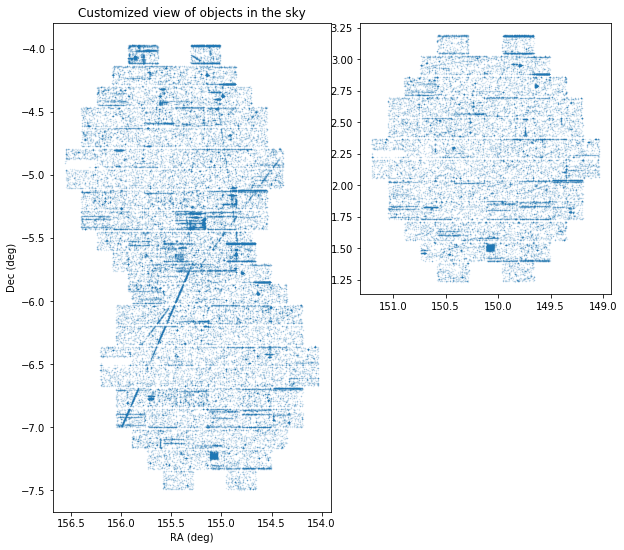

In [23]:
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((100, 100), (0, 55), rowspan=50, colspan=45)
ax2 = plt.subplot2grid((100, 100), (0, 0), rowspan=90, colspan=50)

ax1Filter = (objTable['decl'] > -2)
ax2Filter = (~ax1Filter)

scatter1 = ax1.scatter(objTable.loc[ax1Filter, 'ra'], 
                       objTable.loc[ax1Filter, 'decl'], 
                       marker='.', s=0.5, alpha=0.2)
scatter2 = ax2.scatter(objTable.loc[ax2Filter, 'ra'], 
                       objTable.loc[ax2Filter, 'decl'], 
                       marker='.', s=0.5, alpha=0.2)

ax1.invert_xaxis()
ax2.invert_xaxis()

plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Customized view of objects in the sky')